# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte, verbreitet dieser Beitrag falsche Informationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

In diesem Lernmodul sollen mithilfe computergestützter Methoden auf jene Fragen eine Antwort gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) über die verfügbaren Daten (hier: Textbeiträge) treffen kann, müssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und der folgenden Bibliotheken durch.

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
3. Modell
    1. Textdaten einbetten
    2. Textdaten klassifizieren
4. Verwendung
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Dies geschieht in der Datendomäne. Daraufhin bewegen sich die Teilnehmer in der Modelldomäne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analyses)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Ihr könnt euch bestimmt vorstellen, dass die Erzeugung von gänzlich Neuem aufwendiger ist, als das Entscheiden über vorliegende Inhalte und so beschäftigt sich dieses Lernmodul mit der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, welche die Grundgesamtheit des Datensatzes bilden. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann.

Im späteren Verlauf werden wir von der Daten- in die Modelldomäne voranschreiten. Hier werden einzelne Merkmale verworfen, andere wiederum für eine Modellvorhersage herangezogen. Mehr dazu im Abschnitt 3, denn zunächst beschaffen wir uns die Daten...

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

Zu Beginn holen wir uns die benötigten Daten mithilfe von Pandas aus einem ZIP-Archiv.

In [2]:
twitter = pd.read_json('./tweets.json.gz', compression='gzip')

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie sehen unsere Daten aus?

In [3]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.1-b,status,1212046141279354880,1.140992e+18,2019-12-31 16:21:33+00:00,2019-12-31 16:21:39.286956+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.1-b,status,1212046145645662208,7.137519e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.657847+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.1-b,status,1212046145737961472,7.158583e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.700276+00:00,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.1-b,status,1211821086905683968,1.106642e+18,2019-12-31 01:27:16+00:00,2019-12-31 16:21:40.016141+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1582.0,4518,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.1-b,status,1212046149990916096,9.990299e+08,2019-12-31 16:21:35+00:00,2019-12-31 16:21:40.711065+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wie viele Werte liegen insgesamt vor?

In [4]:
twitter.size

1300000

Wie viele Beispiele liegen insgesamt vor?

In [5]:
twitter.shape[0]

50000

50.000 Beispiele sind ein paar Beispiele zu viel. Wir machen mit lediglich 50 Beispielen wie folgt weiter...

In [6]:
twitter = twitter[:50]

Wie viele Werte liegen pro Beispiel vor?

In [7]:
twitter.shape[1]

26

Welche Merkmale bzw. Wertetypen liegen vor?

In [8]:
twitter.dtypes

twista                        object
type                          object
id                             int64
user                         float64
created_at       datetime64[ns, UTC]
recorded_at      datetime64[ns, UTC]
source                        object
retweets                     float64
favourites                     int64
lang                          object
hashtags                      object
urls                          object
mentions                      object
mentioned_ids                 object
text                          object
name                          object
screen_name                   object
location                      object
description                   object
url                           object
verified                     float64
followers                    float64
friends                      float64
listed                       float64
statuses                     float64
refers_to                    float64
dtype: object

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame _twitter_ in eine DataSeries _tweets_.

In [9]:
tweets = twitter['text']
tweets.head()

0    Hahaha.., da haben "die Nazis" aber Glück 🍀 ge...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    niggas pull a bad bitch and be insecure as hel...
4    31.12.2019. Breitscheidplatz. Weihnachtsmarkt....
Name: text, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...

In [10]:
tweets_cleaned = tweets.replace(regex={'[^a-zA-Z0-9äöüßÄÖU\s]' : ''})
tweets_cleaned.head()

0    Hahaha da haben die Nazis aber Glück  gehabt u...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    niggas pull a bad bitch and be insecure as hel...
4    31122019 Breitscheidplatz Weihnachtsmarkt Aus ...
Name: text, dtype: object

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:

In [11]:
tweets_tokenized = tweets_cleaned.str.split()
tweets_tokenized.head()

0    [Hahaha, da, haben, die, Nazis, aber, Glück, g...
1    [Ich, wünsche, allen, guten, Menschen, ein, ge...
2    [Wir, wünschen, euch, einen, guten, Rutsch, un...
3    [niggas, pull, a, bad, bitch, and, be, insecur...
4    [31122019, Breitscheidplatz, Weihnachtsmarkt, ...
Name: text, dtype: object

Wie viele Wörter sind im längsten Tweet enthalten?

In [12]:
tweets_length = [len(tweet) for tweet in tweets_tokenized]
np.max(tweets_length)

51

Wie viele Tweets haben eine bestimmte Länge? Die folgende Funktion _plot_tweet_length_distribution_ hilft uns dabei:

In [13]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

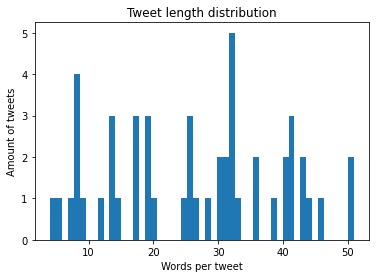

In [14]:
plot_tweet_length_distribution(tweets_length)

Wie lauten die am häufigsten verwendeten Wörter? Dabei hilft uns die Funktionalität [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist), welche eine Häufigkeitsverteilung über alle Wörter bildet.

In [15]:
from nltk.probability import FreqDist
fd = FreqDist(tweets_tokenized.aggregate(np.concatenate))

Wie lauten jetzt die zehn häufigsten Wörter?

In [16]:
fd.most_common(10)

[('und', 24),
 ('ein', 20),
 ('die', 17),
 ('to', 16),
 ('a', 14),
 ('in', 13),
 ('SUHO', 12),
 ('BEST', 12),
 ('LEADER', 12),
 ('das', 11)]

Wie sieht das Histogramm dazu aus?

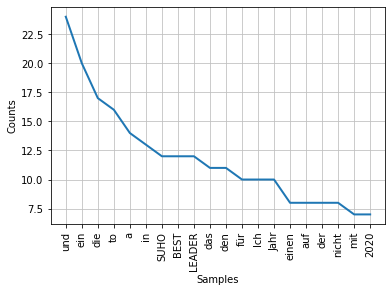

In [17]:
fd.plot(20)

Neben dem Histogramm lässt sich auch eine sog. Schlagwort-Wolke aus den Wörtern erzeugen. Dazu nutzen wir die Funktionalität von [WordCloud](http://amueller.github.io/word_cloud/index.html).

In [18]:
from wordcloud import WordCloud
wc = WordCloud()

Da wir im vorherigen Schritt bereits die Wortverteilung berechnet haben, lässt sich diese im folgenden wiederverwenden.

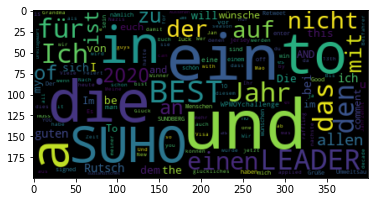

In [19]:
plt.imshow(wc.generate_from_frequencies(fd), interpolation="bilinear")
plt.show()

<div style="background-color: #ff0000; padding: 5px;">Work in Progress</div>

## 3. <a id='modell'>Modell</a>

### 3.1 Textdaten einbetten

#### 3.1.1 Positives Vokabular

In [20]:
positive = pd.read_csv('./positive.txt', lineterminator='\n', sep='\t', header=0, names=['Word', 'Score', 'Declination'])
positive.head()

,Word,Score,Declination
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen"
1,Abstimmung|NN,0.004,Abstimmungen
2,Agilität|NN,0.004,NaN
3,Aktivität|NN,0.004,Aktivitäten
4,Aktualisierung|NN,0.004,Aktualisierungen


In [21]:
print("Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.")
positive[['Word', 'Tag']] = positive['Word'].str.split('|', 1, expand=True)
positive.head()

Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.


,Word,Score,Declination,Tag
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN
1,Abstimmung,0.004,Abstimmungen,NN
2,Agilität,0.004,NaN,NN
3,Aktivität,0.004,Aktivitäten,NN
4,Aktualisierung,0.004,Aktualisierungen,NN


In [22]:
positive = positive.fillna('')
positive

,Word,Score,Declination,Tag
0,Abschluß,0.0040,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN
1,Abstimmung,0.0040,Abstimmungen,NN
2,Agilität,0.0040,,NN
3,Aktivität,0.0040,Aktivitäten,NN
4,Aktualisierung,0.0040,Aktualisierungen,NN
...,...,...,...,...
1644,überwältigt,0.0578,,VVINF
1645,überzeugen,0.3396,,VVINF
1646,überzeugend,0.4489,,ADJX
1647,überzeugt,0.2381,"überzeugtestem,überzeugtesten,überzeugtester,ü...",ADJX


In [23]:
positive['Merged'] = positive['Word'] + ',' + positive['Declination']

In [24]:
positive['Merged'] = positive['Merged'].str.split(',')
positive.sort_values('Score')

,Word,Score,Declination,Tag,Merged
0,Abschluß,0.0040,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,"[Abschluß, Abschlüße, Abschlußs, Abschlußes, A..."
798,erheblich,0.0040,"erheblichste,erheblicherem,erheblichsten,erheb...",ADJX,"[erheblich, erheblichste, erheblicherem, erheb..."
797,erhebend,0.0040,"erhebendstem,erhebendsten,erhebender,erhebende...",ADJX,"[erhebend, erhebendstem, erhebendsten, erheben..."
796,erhalten,0.0040,,VVINF,"[erhalten, ]"
1435,unfehlbar,0.0040,"unfehlbares,unfehlbarstem,unfehlbarsten,unfehl...",ADJX,"[unfehlbar, unfehlbares, unfehlbarstem, unfehl..."
...,...,...,...,...,...
1342,spannend,0.7165,"spannendste,spannender,spannendes,spannenderen...",ADJX,"[spannend, spannendste, spannender, spannendes..."
1581,wunderbar,0.7234,"wunderbarerem,wunderbarste,wunderbarster,wunde...",ADJX,"[wunderbar, wunderbarerem, wunderbarste, wunde..."
301,Lob,0.7246,"Loben,Lobs,Lobes,Lobe",NN,"[Lob, Loben, Lobs, Lobes, Lobe]"
1214,perfekt,0.7299,"perfekterer,perfektest,perfekteren,perfektes,p...",ADJX,"[perfekt, perfekterer, perfektest, perfekteren..."


In [25]:
positive_stemmed = positive.explode('Merged')
positive_stemmed.sort_values('Word')

,Word,Score,Declination,Tag,Merged
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschluß
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlüße
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlußs
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlußes
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlüßen
...,...,...,...,...,...
1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppiges
1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppig
1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigerem
1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigsten


In [26]:
positive_stemmed = positive_stemmed.sort_values('Word').reset_index()

In [27]:
positive_stemmed = positive_stemmed.rename(columns={'Word': 'Stem', 'Merged': 'Word'})
positive_stemmed

,index,Stem,Score,Declination,Tag,Word
0,0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschluß
1,0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlüße
2,0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlußs
3,0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlußes
4,0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN,Abschlüßen
...,...,...,...,...,...,...
16045,1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppiges
16046,1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppig
16047,1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigerem
16048,1648,üppig,0.201,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigsten


In [28]:
positive_stemmed.drop(['index', 'Declination'], axis=1)

,Stem,Score,Tag,Word
0,Abschluß,0.004,NN,Abschluß
1,Abschluß,0.004,NN,Abschlüße
2,Abschluß,0.004,NN,Abschlußs
3,Abschluß,0.004,NN,Abschlußes
4,Abschluß,0.004,NN,Abschlüßen
...,...,...,...,...
16045,üppig,0.201,ADJX,üppiges
16046,üppig,0.201,ADJX,üppig
16047,üppig,0.201,ADJX,üppigerem
16048,üppig,0.201,ADJX,üppigsten


#### 3.1.2 Negatives Vokabular

In [29]:
negative = pd.read_csv('./negative.txt', lineterminator='\n', sep='\t', header=0, names=['Word', 'Score', 'Declination'])
negative.head()

,Word,Score,Declination
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen"
1,Abdankung|NN,-0.0048,Abdankungen
2,Abdämpfung|NN,-0.0048,Abdämpfungen
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen"
4,Abfuhr|NN,-0.3367,Abfuhren


In [30]:
print("Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.")
negative[['Word', 'Tag']] = negative['Word'].str.split('|', 1, expand=True)
negative.head()

Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.


,Word,Score,Declination,Tag
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN
1,Abdankung,-0.0048,Abdankungen,NN
2,Abdämpfung,-0.0048,Abdämpfungen,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",NN
4,Abfuhr,-0.3367,Abfuhren,NN


In [31]:
negative = negative.fillna('')
negative

,Word,Score,Declination,Tag
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN
1,Abdankung,-0.0048,Abdankungen,NN
2,Abdämpfung,-0.0048,Abdämpfungen,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",NN
4,Abfuhr,-0.3367,Abfuhren,NN
...,...,...,...,...
1812,übersehen,-0.5128,,VVINF
1813,übertreiben,-0.0372,,VVINF
1814,übertreten,-0.3290,,VVINF
1815,übertrieben,-0.3203,"übertriebenes,übertriebenerer,übertriebeneres,...",ADJX


In [32]:
negative['Merged'] = negative['Word'] + ',' + negative['Declination']

In [33]:
negative['Merged'] = negative['Merged'].str.split(',')
negative.sort_values(by='Score')

,Word,Score,Declination,Tag,Merged
235,Gefahr,-1.0000,Gefahren,NN,"[Gefahr, Gefahren]"
464,Schuld,-0.9686,Schulden,NN,"[Schuld, Schulden]"
1538,unnötig,-0.9463,"unnötigstes,unnötigere,unnötige,unnötigeren,un...",ADJX,"[unnötig, unnötigstes, unnötigere, unnötige, u..."
1378,schädlich,-0.9269,"schädlicher,schädlicheren,schädlichem,schädlic...",ADJX,"[schädlich, schädlicher, schädlicheren, schädl..."
1366,schwach,-0.9206,"schwächstem,schwächsten,schwächster,schwächste...",ADJX,"[schwach, schwächstem, schwächsten, schwächste..."
...,...,...,...,...,...
725,androhen,-0.0048,"angedroht,androhte,androhest,androhtest,androh...",VVINF,"[androhen, angedroht, androhte, androhest, and..."
721,alt,-0.0048,"alte,altem,alten,ältest,alter,altes,älteres,äl...",ADJX,"[alt, alte, altem, alten, ältest, alter, altes..."
736,anstrengen,-0.0048,"anstrengtet,anstrengest,anstrenget,angestrengt...",VVINF,"[anstrengen, anstrengtet, anstrengest, anstren..."
1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,"[überwältigen, überwältigest, überwältigten, ü..."


In [34]:
negative_stemmed = negative.explode('Merged')
negative_stemmed.sort_values('Word')

,Word,Score,Declination,Tag,Merged
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruch
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruches
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüche
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruchs
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüchen
...,...,...,...,...,...
1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigten
1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigest
1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigen
1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigt


In [35]:
negative_stemmed = negative_stemmed.sort_values('Word').reset_index()
negative_stemmed

,index,Word,Score,Declination,Tag,Merged
0,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruch
1,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruches
2,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüche
3,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruchs
4,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüchen
...,...,...,...,...,...,...
16026,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigten
16027,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigest
16028,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigen
16029,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigt


In [36]:
negative_stemmed = negative_stemmed.rename(columns={'Word': 'Stem', 'Merged': 'Word'})
negative_stemmed

,index,Stem,Score,Declination,Tag,Word
0,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruch
1,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruches
2,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüche
3,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruchs
4,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüchen
...,...,...,...,...,...,...
16026,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigten
16027,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigest
16028,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigen
16029,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigt


In [37]:
negative_stemmed.drop(['index', 'Declination'], axis=1)

,Stem,Score,Tag,Word
0,Abbruch,-0.0048,NN,Abbruch
1,Abbruch,-0.0048,NN,Abbruches
2,Abbruch,-0.0048,NN,Abbrüche
3,Abbruch,-0.0048,NN,Abbruchs
4,Abbruch,-0.0048,NN,Abbrüchen
...,...,...,...,...
16026,überwältigen,-0.0048,VVINF,überwältigten
16027,überwältigen,-0.0048,VVINF,überwältigest
16028,überwältigen,-0.0048,VVINF,überwältigen
16029,überwältigen,-0.0048,VVINF,überwältigt


In [38]:
negative_stemmed

,index,Stem,Score,Declination,Tag,Word
0,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruch
1,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruches
2,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüche
3,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruchs
4,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüchen
...,...,...,...,...,...,...
16026,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigten
16027,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigest
16028,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigen
16029,1816,überwältigen,-0.0048,"überwältigest,überwältigten,überwältige,überwä...",VVINF,überwältigt


### 3.1.3 Gesamtes Vokabular

In [39]:
negative_positive = pd.concat([negative_stemmed, positive_stemmed])
negative_positive

,index,Stem,Score,Declination,Tag,Word
0,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruch
1,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruches
2,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüche
3,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbruchs
4,0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN,Abbrüchen
...,...,...,...,...,...,...
16045,1648,üppig,0.2010,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppiges
16046,1648,üppig,0.2010,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppig
16047,1648,üppig,0.2010,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigerem
16048,1648,üppig,0.2010,"üppiges,üppigster,üppigstes,üppigen,üppigst,üp...",ADJX,üppigsten


In [40]:
print("Welche Wort-Typen sind vorhanden?")
negative_positive.groupby('Tag').count()

Welche Wort-Typen sind vorhanden?


,index,Stem,Score,Declination,Word
Tag,,,,,
ADJX,22960,22960,22960,22960,22960
ADV,37,37,37,37,37
NN,3182,3182,3182,3182,3182
VVINF,5902,5902,5902,5902,5902


In [41]:
negative_positive.describe()

,index,Score
count,32081.000000,32081.000000
mean,1082.375799,-0.045512
std,402.508151,0.220233
min,0.000000,-1.000000
25%,808.000000,-0.046500
50%,1110.000000,0.004000
75%,1411.000000,0.004000
max,1816.000000,1.000000


In [42]:
corpus = {'negative' : negative_stemmed, 'positive' : positive_stemmed}

### 3.2 Textdaten klassifizieren

In [43]:
def classify(sequence):
    
    result = { 'negative' : {}, 'positive' : {}}
    
    for key, value in corpus.items():
            
        result[key] = {'score' : 0.0 , 'num' : 0.0, 'normalized' : 0.0}
        
        for token in sequence:
            word = value.loc[value['Word'] == token]
            if len(word['Score'].to_numpy()) == 0:
                val = 0.0
            else:
                val = word['Score'].to_numpy()
                
            result[key]['score'] = result[key]['score'] + val
            result[key]['num'] += 1
        
        result[key]['normalized'] = result[key]['score'] / result[key]['num']
        
    return result['negative']['score'], result['positive']['score']

In [44]:
def classify_many(data):
    
    print('#\tIst\tNeg\tPos\tBeispiel')
    
    for example in data.iteritems():
        n, p = classify(example[1])
        print('%i\t%.4f\t%.4f\t%.4f\t%s' % (example[0], n + p, n, p, ' '.join(example[1])))

In [45]:
def classify_many_with_labels(data):
    
    print('#\tSoll\tIst\tNeg\tPos\tBeispiel')
    
    for example in data.itertuples():
        n, p = classify(example[1])
        print('%i\t%.1f\t%.4f\t%.4f\t%.4f\t%s' % (example[0], example[2], n + p, n, p, ' '.join(example[1])))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

### 4.X Dummy-Daten klassifizieren

In [46]:
data = pd.DataFrame([
    ["Dieses Lernmodul ist super, wunderbar und ganz besonders klasse!", 1],
    ["Dieses Lernmodul ist fürchterlich, schrecklich und höchst unprofessionell!", 0],
    ["Dieses Lernmodul finde ich auf der einen Seite spannend und auf der anderen Seite langweilig.", -1],
    ["Wunderbar, Agilität, Toll Super Klasse Klasse Klasse Toll", 1]
], columns=['Beispiel', 'Stimmung'])

In [47]:
examples = data['Beispiel']
examples.head()

0    Dieses Lernmodul ist super, wunderbar und ganz...
1    Dieses Lernmodul ist fürchterlich, schrecklich...
2    Dieses Lernmodul finde ich auf der einen Seite...
3    Wunderbar, Agilität, Toll Super Klasse Klasse ...
Name: Beispiel, dtype: object

In [48]:
examples_cleaned = examples.replace(regex={'[^a-zA-Z0-9äöüßÄÖU\s]' : ''})
examples_cleaned

0    Dieses Lernmodul ist super wunderbar und ganz ...
1    Dieses Lernmodul ist fürchterlich schrecklich ...
2    Dieses Lernmodul finde ich auf der einen Seite...
3    Wunderbar Agilität Toll Super Klasse Klasse Kl...
Name: Beispiel, dtype: object

In [49]:
print("Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:")
examples_tokenized = examples_cleaned.str.split()
examples_tokenized

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:


0    [Dieses, Lernmodul, ist, super, wunderbar, und...
1    [Dieses, Lernmodul, ist, fürchterlich, schreck...
2    [Dieses, Lernmodul, finde, ich, auf, der, eine...
3    [Wunderbar, Agilität, Toll, Super, Klasse, Kla...
Name: Beispiel, dtype: object

In [50]:
data['Beispiel'] = examples_tokenized

In [51]:
classify_many_with_labels(data)

#	Soll	Ist	Neg	Pos	Beispiel
0	1.0	2.1111	0.0000	2.1111	Dieses Lernmodul ist super wunderbar und ganz besonders klasse
1	0.0	-0.3565	-0.3605	0.0040	Dieses Lernmodul ist fürchterlich schrecklich und höchst unprofessionell
2	-1.0	0.6937	-0.0228	0.7165	Dieses Lernmodul finde ich auf der einen Seite spannend und auf der anderen Seite langweilig
3	1.0	0.0040	0.0000	0.0040	Wunderbar Agilität Toll Super Klasse Klasse Klasse Toll


### 4.X Reale Daten klassifizieren

In [52]:
classify_many(tweets_tokenized)

#	Ist	Neg	Pos	Beispiel
0	0.4904	0.0000	0.4904	Hahaha da haben die Nazis aber Glück gehabt und was für ein Glück Hust Welcher Mann bitteschön würde denn mit DER na Ihr wisst schon httpstcoa749iauM9U
1	0.6460	0.0000	0.6460	Ich wünsche allen guten Menschen ein gesundes und glückliches Jahr 2020 Nur denen die aus berzeugung afd wählen denen wünsch ich ein richtig Beschissenes Viele Grüße
2	0.8681	-0.0096	0.8777	Wir wünschen euch einen guten Rutsch und für das neue Jahr nur das Beste Lasst es krachen und feiert schön jurahannover conticampus leibnizuniversität unihannover hannover hannoverstagram httpstco5nVyrVSEqc
3	0.2350	0.0000	0.2350	niggas pull a bad bitch and be insecure as hell afterwards shouldve stayed in ya range pussy
4	-0.0048	-0.0048	0.0000	31122019 Breitscheidplatz Weihnachtsmarkt Aus den Stereoboxen erklingt ein stimmungsschweres FUCK YOU I WONT DO WHAT YOU TELL ME Guten Rutsch
5	0.0964	0.0000	0.0964	Wir wünschen allen ein friedliches und sorgenfreies Jahr 2020 und a git Rosc

<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>